<a href="https://colab.research.google.com/github/aish0606/deep-text-recognition-benchmark/blob/master/textRecogSTAR_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%ls /gdrive/My\ Drive/SroieData/test/ | wc -l

196


In [ ]:
%cd "/content/drive/My Drive/Code" 

/content/drive/My Drive/Code


In [ ]:
!git clone https://github.com/clovaai/deep-text-recognition-benchmark

Cloning into 'deep-text-recognition-benchmark'...
remote: Enumerating objects: 491, done.
remote: Total 491 (delta 0), reused 0 (delta 0), pack-reused 491
Receiving objects: 100% (491/491), 3.05 MiB | 2.44 MiB/s, done.
Resolving deltas: 100% (302/302), done.


In [ ]:
%cd "/content/drive/My Drive/Code/deep-text-recognition-benchmark"

/content/drive/My Drive/Code/deep-text-recognition-benchmark


In [ ]:
!du -csh "/content/drive/My Drive/TPS-ResNet-BiLSTM-Attn.pth"

190M	/content/drive/My Drive/TPS-ResNet-BiLSTM-Attn.pth
190M	total


In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 demo.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder demo_image/ \
--saved_model Copy\ of\ TPS-ResNet-BiLSTM-Attn.pth

model input parameters 32 100 20 1 512 256 38 25 TPS ResNet BiLSTM Attn
loading pretrained model from Copy of TPS-ResNet-BiLSTM-Attn.pth
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
demo_image/Round.jpg     	roundditating            	0.0965
demo_image/cash_bill.jpg 	cishbulling              	0.0045
demo_image/congratulations.jpg	contragulations          	0.0031
demo_image/demo_1.png    	available                	0.9999
demo_image/demo_2.jpg    	shakeshack               	0.9533
demo_image/demo_3.png    	london                   	0.9840
demo_image/demo_4.png    	greenstead               	0.9985
demo_image/demo_5.png    	toast                    	0.9961
demo_image/demo_6.png    	merry                    	0.9975
demo_image/demo_7.png    	underground              	1.0000
demo_image/demo_8.jpg    	ronaldo    

***Data Preparation***

1. Preparing Training *Data*

In [ ]:
%cp -r /gdrive/My\ Drive/sroie/train /gdrive/My\ Drive/SroieData/

In [ ]:
%cd "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data"

/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data


In [ ]:
!python create_images.py

964
Corrupt JPEG data: bad Huffman code
Error: File /gdrive/My Drive/SroieData/train/gt_X51006328967.txt is in wrong format.
 Expected: xmin, ymin, x, y, xmax, ymax, x, y, original_text
 Received: 


In [ ]:
import glob
import shutil
img_data = glob.glob("*.jpg")
cnt = 0
for i in img_data[0:47]:
  gt_name = 'gt_' + i.split('.')[0] + '.txt'
  shutil.move(gt_name, "/gdrive/My Drive/SroieData/validation/")
  shutil.move(i, "/gdrive/My Drive/SroieData/validation/")

In [ ]:
%cd /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/train_data/data/test/

/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/data/test


In [ ]:
ls /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/train_data/data/test | wc -l

0


2. Preparing Validation Data

In [ ]:
%cd "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data"

/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data


In [ ]:
!python create_images.py

51


In [ ]:
%cd "/gdrive/My Drive/Code/deep-text-recognition-benchmark/test_data/data/test"

/gdrive/My Drive/Code/deep-text-recognition-benchmark/test_data/data/test


In [ ]:
%cd "/gdrive/My Drive/Code/deep-text-recognition-benchmark"

/gdrive/My Drive/Code/deep-text-recognition-benchmark


In [ ]:
!pip3 install fire

     |████████████████████████████████| 81kB 2.7MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=3f5dc22acc7b0d9b480747b59d86228bb8e4fe6b41fed40b24ce157de51b6040
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire


In [ ]:
!python3 create_lmdb_dataset.py \
--inputPath /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/train_data/data/ \
--gtFile /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/train_data/data/gt.txt \
--outputPath /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/train_data/result/

Written 1000 / 51743
Written 2000 / 51743
Written 3000 / 51743
Written 4000 / 51743
Written 5000 / 51743
Written 6000 / 51743
Written 7000 / 51743
Written 8000 / 51743
Written 9000 / 51743
Written 10000 / 51743
Written 11000 / 51743
Written 12000 / 51743
Written 13000 / 51743
Written 14000 / 51743
Written 15000 / 51743
Written 16000 / 51743
Written 17000 / 51743
Written 18000 / 51743
Written 19000 / 51743
Written 20000 / 51743
Written 21000 / 51743
Written 22000 / 51743
Written 23000 / 51743
Written 24000 / 51743
Written 25000 / 51743
Written 26000 / 51743
Written 27000 / 51743
Written 28000 / 51743
Written 29000 / 51743
Written 30000 / 51743
Written 31000 / 51743
Written 32000 / 51743
Written 33000 / 51743
Written 34000 / 51743
Written 35000 / 51743
Written 36000 / 51743
Written 37000 / 51743
Written 38000 / 51743
Written 39000 / 51743
Written 40000 / 51743
Written 41000 / 51743
/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/data/test/word_41259.png does not exist
Wr

Training for STAR-Net --> ***TRBA***

In [ ]:
%cd "/gdrive/My Drive/Code/deep-text-recognition-benchmark"

/gdrive/My Drive/Code/deep-text-recognition-benchmark


In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 train.py \
--train_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/" \
--valid_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/" \
--exp_name "/gdrive/My Drive/Code/deep-text-recognition-benchmark/model_res/" \
--batch_ratio 1 --num_iter 30000 --batch_size 50 --sensitive \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/	 dataset: /
sub-directory:	/.	 num samples: 26629
num total samples of /: 26629 x 1.0 (total_data_usage_ratio) = 26629
num samples of / per batch: 50 x 1.0 (batch_ratio) = 50
--------------------------------------------------------------------------------
Total_batch_size: 50 = 50
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/	 dataset: /
su

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 train.py \
--train_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/" \
--valid_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/" \
--exp_name "model_res_2/" \
--batch_ratio 1 --num_iter 30000 --batch_size 50 --sensitive \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/	 dataset: /
sub-directory:	/.	 num samples: 26629
num total samples of /: 26629 x 1.0 (total_data_usage_ratio) = 26629
num samples of / per batch: 50 x 1.0 (batch_ratio) = 50
--------------------------------------------------------------------------------
Total_batch_size: 50 = 50
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/	 dataset: /
su

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 train.py \
--train_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/" \
--valid_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/" \
--exp_name "model_res_3/" \
--batch_ratio 1 --num_iter 30000 --batch_size 50 --lr 0.5 --sensitive \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/	 dataset: /
Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /gdri

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 train.py \
--train_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/" \
--valid_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/" \
--exp_name "model_res_4/" --data_filtering_off \
--batch_ratio 1 --num_iter 16000 --batch_size 50 --lr 0.5 --sensitive \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

--------------------------------------------------------------------------------
dataset_root: /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/	 dataset: /
sub-directory:	/.	 num samples: 51742
num total samples of /: 51742 x 1.0 (total_data_usage_ratio) = 51742
num samples of / per batch: 50 x 1.0 (batch_ratio) = 50
--------------------------------------------------------------------------------
Total_batch_size: 50 = 50
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/	 dataset: /
sub-directory:	/.	 num samples: 2864
--------------------------------------------------------------------------------
model input parameters 32 2

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 train.py \
--train_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/" \
--valid_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/" \
--exp_name "model_res_5/" --data_filtering_off \
--batch_ratio 1 --num_iter 30000 --batch_size 50 --lr 0.7 --sensitive \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

--------------------------------------------------------------------------------
dataset_root: /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/	 dataset: /
sub-directory:	/.	 num samples: 51742
num total samples of /: 51742 x 1.0 (total_data_usage_ratio) = 51742
num samples of / per batch: 50 x 1.0 (batch_ratio) = 50
--------------------------------------------------------------------------------
Total_batch_size: 50 = 50
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/	 dataset: /
sub-directory:	/.	 num samples: 2864
--------------------------------------------------------------------------------
model input parameters 32 2

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 train.py \
--train_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/" \
--valid_data "/gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/" \
--exp_name "model_res_6/" --data_filtering_off \
--batch_ratio 1 --num_iter 30000 --batch_size 50 --lr 0.5 --sensitive \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn

--------------------------------------------------------------------------------
dataset_root: /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/
opt.select_data: ['/']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/train_data/result/	 dataset: /
sub-directory:	/.	 num samples: 51742

In line 43 in dataset.py _dataset is: <torch.utils.data.dataset.ConcatDataset object at 0x7f381ea88240>
total_number_dataset is 51742
num total samples of /: 51742 x 1.0 (total_data_usage_ratio) = 51742
num samples of / per batch: 50 x 1.0 (batch_ratio) = 50
--------------------------------------------------------------------------------
Total_batch_size: 50 = 50
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/validation_data/result/	 dataset: /
sub-direct

In [ ]:
# For Model 7 use --character='' from the command line and check num_classes

TESTING for STAR-Net --> TRBA

In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 test.py \
--eval_data /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/test_data/ --benchmark_all_eval \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--batch_size 50 --sensitive --data_filtering_off \
--saved_model /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/saved_models/model_res_6/best_accuracy.pth

model input parameters 32 200 20 1 512 256 98 75 TPS ResNet BiLSTM Attn
loading pretrained model from /gdrive/My Drive/Code/deep-text-recognition-benchmark/saved_models/model_res_6/best_accuracy.pth
cp: target 'Drive_Code_deep-text-recognition-benchmark_saved_models_model_res_6_best_accuracy.pth/' is not a directory
--------------------------------------------------------------------------------
dataset_root:    /gdrive/My Drive/Code/deep-text-recognition-benchmark/test_data/result	 dataset: /
sub-directory:	/.	 num samples: 2765
                            aik huat hardware                             aik huat hardware	0.560
                            enterprise (setia                             enterprise (setia	0.872
                                alam) sdn bhd                                 alam) sdn bhd	0.987
                                     822737-x                                      822737-x	0.989
                  no. 17-g, jalan setia indah                   no. 17-g

In [ ]:
# -()\"#/@;:<>{}`+=~|.!?,$
# Model 1 default='0123456789abcdefghijklmnopqrstuvwxyz -()\"#/@;:<>{}`+=~|.!?,$'
# Model 2 default='0123456789abcdefghijklmnopqrstuvwxyz !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# Model 3 default='0123456789,.:(%$!^&-/);<~|`>?+=_[]{}"\'@#*ABCDEFGHIJKLMNOPQRSTUVWXYZ\ '
# Model 4 default='0123456789,.:(%$!^&-/);<~`>?+=_[\\]{|}"\'@#*ABCDEFGHIJKLMNOPQRSTUVWXYZ\ '
# Model 6 default='0123456789,.:(%$!^&-/);<~`>?+=_[\\]{|}"\'@#*ABCDEFGHIJKLMNOPQRSTUVWXYZ\ ' + ' '
# Model 7 default='€£Â0123456789,.:(%$!^&-/);<~`>?+=_[\\]{|}"\'@#*ABCDEFGHIJKLMNOPQRSTUVWXYZ\ ' + ' '
# give --character through command line

Running the DEMO TRBA

In [ ]:
%cd "/gdrive/My Drive/Code/deep-text-recognition-benchmark"

/gdrive/My Drive/Code/deep-text-recognition-benchmark


In [ ]:
!CUDA_VISIBLE_DEVICES=0 python3 demo.py \
--Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn \
--image_folder demo_test/ \
--batch_size 50 --sensitive \
--saved_model /gdrive/My\ Drive/Code/deep-text-recognition-benchmark/saved_models/model_res_6/best_accuracy.pth

model input parameters 32 200 20 1 512 256 98 75 TPS ResNet BiLSTM Attn
loading pretrained model from /gdrive/My Drive/Code/deep-text-recognition-benchmark/saved_models/model_res_6/best_accuracy.pth
--------------------------------------------------------------------------------
image_path               	predicted_labels         	confidence score
--------------------------------------------------------------------------------
demo_test/word_1.png     	AIK HUAT HARDWARE        	0.5599
demo_test/word_10.png    	SIMPUIFIED TAX INVOICE   	0.6691
demo_test/word_130.png   	TAX                      	0.9999
demo_test/word_1001.png  	34.80                    	0.9998
demo_test/word_1004.png  	CHANGE                   	0.9998
demo_test/word_1011.png  	TOTAL                    	0.9999
demo_test/word_1029.png  	GST ID NO(001115316224)  	0.2730
demo_test/word_1072.png  	TOTAL                    	0.9999
demo_test/word_1352.png  	GST SUMMARY              	0.9965
demo_test/word_1469.png  	DESCRIPTION  

In [ ]:
%cd "/gdrive/My Drive/Code/deep-text-recognition-benchmark/saved_models"

/gdrive/My Drive/Code/deep-text-recognition-benchmark/saved_models


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir model_res_6

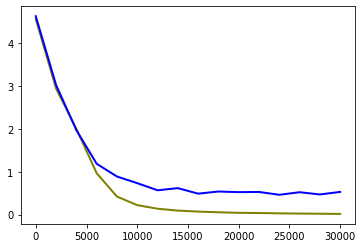

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Data
train_loss = [4.56525, 2.94265, 2.00307, 0.96729, 0.42097, 0.22149, 0.13786, 0.09368, 0.07062, 0.05477, 0.04175, 0.03722, 0.02940, 0.02435, 0.02078, 0.01624]
val_loss = [4.63140, 3.02650, 1.97207, 1.18718, 0.88943, 0.73437, 0.56811, 0.61807, 0.48943, 0.53907, 0.52473, 0.52944, 0.46258, 0.52290, 0.47044, 0.53021]
df = pd.DataFrame({'Step Size': range(0, 30002, 2000), 'train_loss': train_loss, 'validation_loss': val_loss})
plt.plot( 'Step Size', 'train_loss', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'Step Size', 'validation_loss', data=df, marker='', color='blue', linewidth=2)